## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [180]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [181]:
customer_set = pd.read_csv("Mall_Customers.csv")

customer_set.rename(columns={"Annual Income (k$)": "Income"}, inplace=True)
customer_set.rename(columns={"Spending Score (1-100)": "SpendingScore"}, inplace=True)

print(customer_set.head(5))

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [182]:
print(f"Column names:\n{customer_set.columns}")

dataset_size = customer_set.shape

print("Database size:", dataset_size)
print("\nBasic statistics:", customer_set.describe())
print("\nNan in each column:\n", customer_set.isna().sum())

Column names:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')
Database size: (200, 5)

Basic statistics:        CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Nan in each column:
 CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [183]:
customer_set.drop(columns=["CustomerID"], inplace=True)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

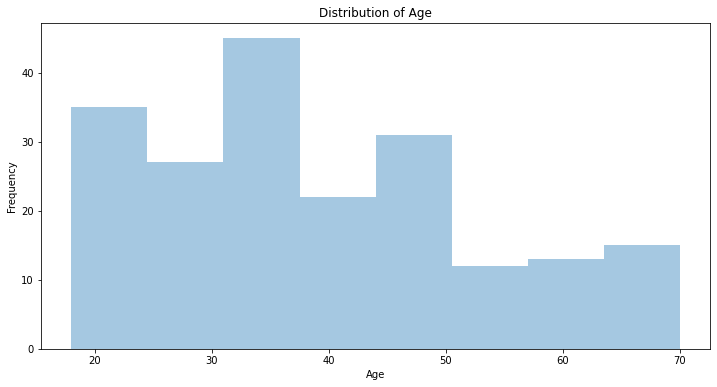

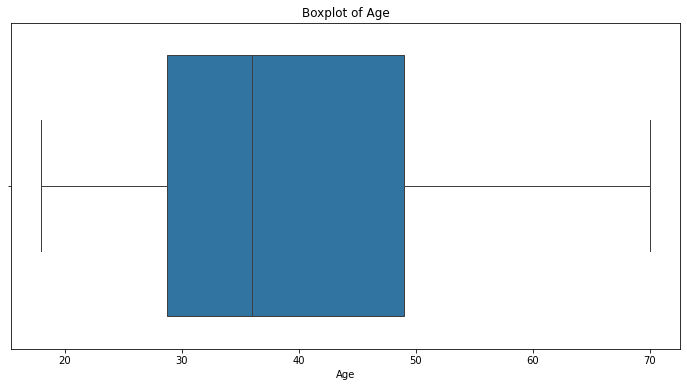

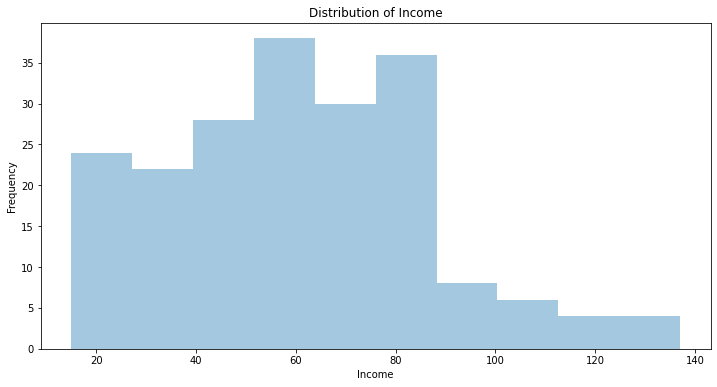

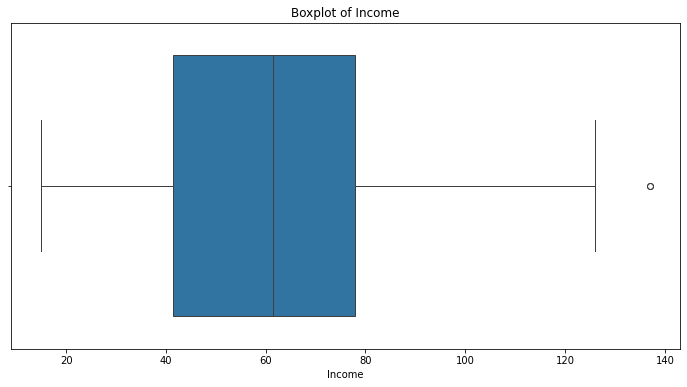

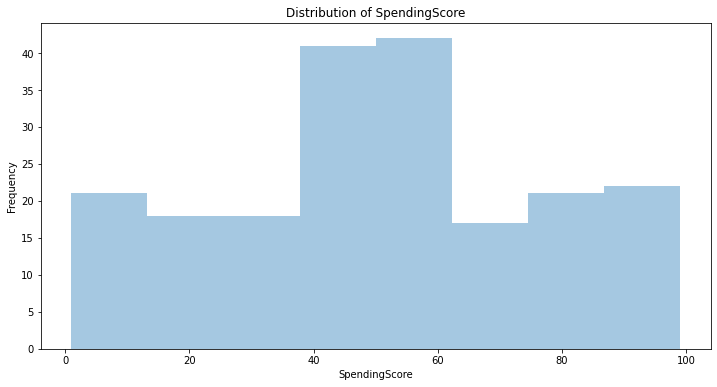

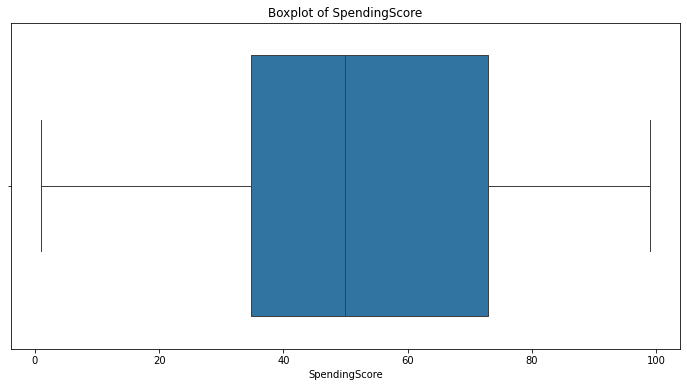

In [184]:
diagrams_to_build = ['Age', 'Income', 'SpendingScore']

for column in diagrams_to_build:
    plt.figure(figsize=(12, 6))
    sns.distplot(customer_set[column], kde=False)
    title = 'Distribution of ' + column
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=customer_set)
    title = 'Boxplot of ' + column
    plt.title(title)
    plt.xlabel(column)
    plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

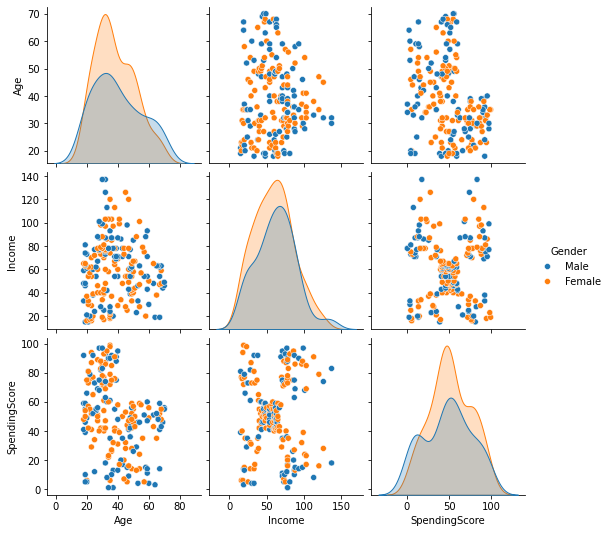

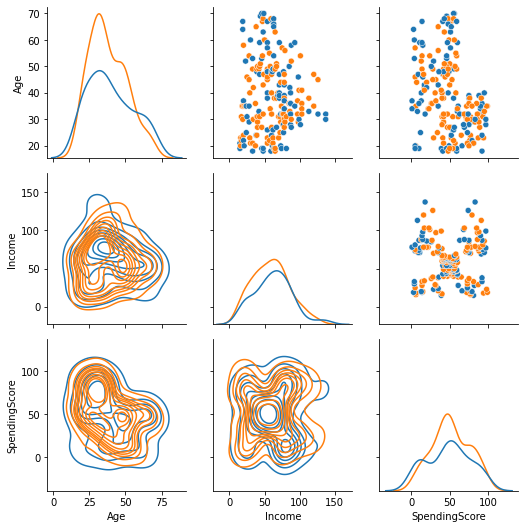

In [185]:
sns.pairplot(customer_set, hue="Gender")
g = sns.PairGrid(customer_set, hue="Gender")
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)

plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Датасет розмірністю (200, 5).
2. Немає пропущених значень в жодній з колонок.
3. Age колонка:
    1. На displot не помічено ніякої теденції, хоча більше 50 значень значно менше.
    2. Боксплот не містить аутлаєрів. 50% даних входить в проміжок 29, 49.
4. Income колонка:
    1. displot показує в загальному ріст до 80, після чого різкий спад
    2. boxplot має один аутлаєр - значення 140. 50% значень входить приблизно в проміжок 40, 80.
5. SpendingScore колонка:
    1. diplot показує набагато більше даних середніх значень. Також він є достатньо симетричним.
    2. boxplot не має аутлаєрів. 50% значень в приблизному проміжку від 35 до 75.
6. Pairplot:
    1. Максимальний жіночий вік помітно перевищує чоловічий.
    2. Максимальна зарплата також більша у жінок.
    3. SpendingScore також є вищим у жінок, ніж у чоловіків.
    4. У counplot(Income, SpendingScore), коли дохід в проміжку (40, 70), то SpendingScore тримається в вузьких рамках порівняно з всіма іншими значеннями доходу.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

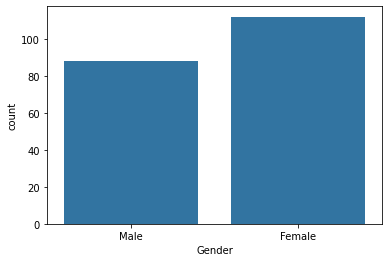

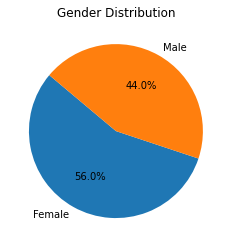

In [186]:
sns.countplot(x='Gender', data=customer_set)

plt.show()

gender_counts = customer_set['Gender'].value_counts()

plt.figure(figsize=(4, 4)) 
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

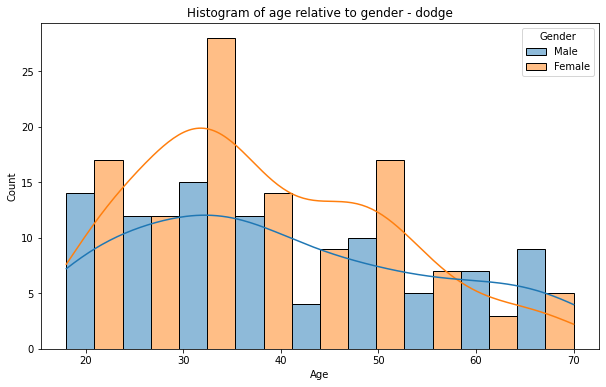

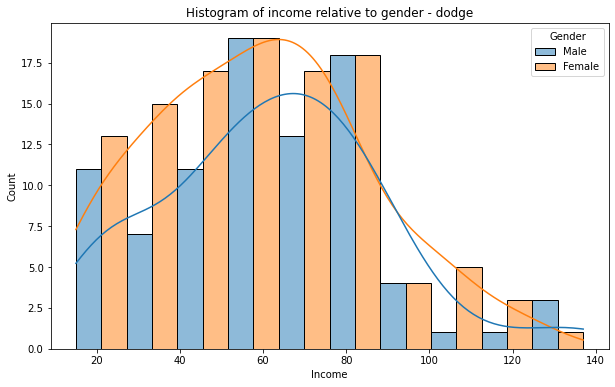

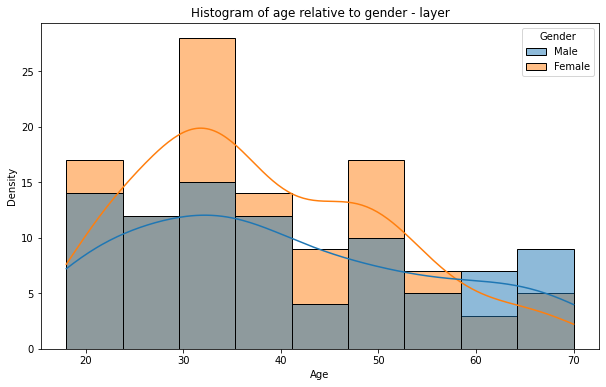

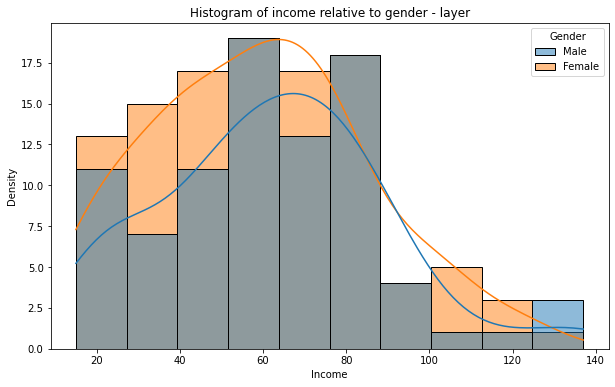

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_set, x='Age', hue='Gender', multiple='dodge', kde=True)
plt.title('Histogram of age relative to gender - dodge')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_set, x='Income', hue='Gender', multiple='dodge', kde=True)
plt.title('Histogram of income relative to gender - dodge')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_set, x='Age', hue='Gender', multiple='layer', kde=True)
plt.title('Histogram of age relative to gender - layer')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_set, x='Income', hue='Gender', multiple='layer', kde=True)
plt.title('Histogram of income relative to gender - layer')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



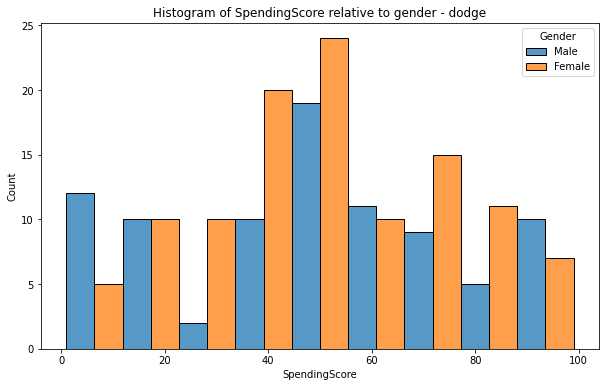

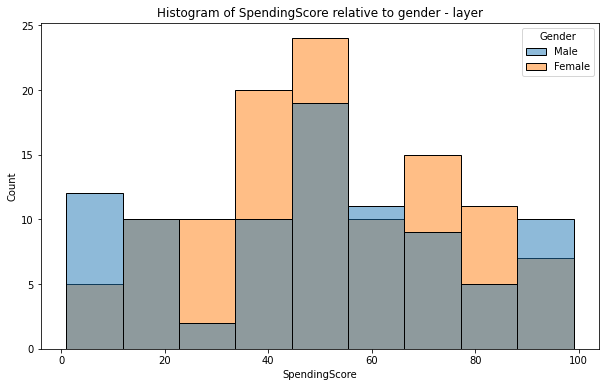

In [188]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_set, x='SpendingScore', hue='Gender', multiple='dodge')
plt.title('Histogram of SpendingScore relative to gender - dodge')
plt.xlabel('SpendingScore')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_set, x='SpendingScore', hue='Gender', multiple='layer')
plt.title('Histogram of SpendingScore relative to gender - layer')
plt.xlabel('SpendingScore')
plt.ylabel('Count')
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

In [189]:
# я вже побудував і зробив аналіз в 3 завданні

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок? 44/56 - жінок більше.
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? В середньому жінки витрачають більше.
3. Чи є різниця між витратами у чоловіків та жінок? Так, жінки в середньому витрачають більше, але найбільші витрати припадають до чоловіків.
4. Найменше теж витрачають чоловіки, їх більш як вдвічі більше.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, для більш обʼєктивного кластерування, сфокусованого лише на числових значеннях, колонка gender буде лише мішати.
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

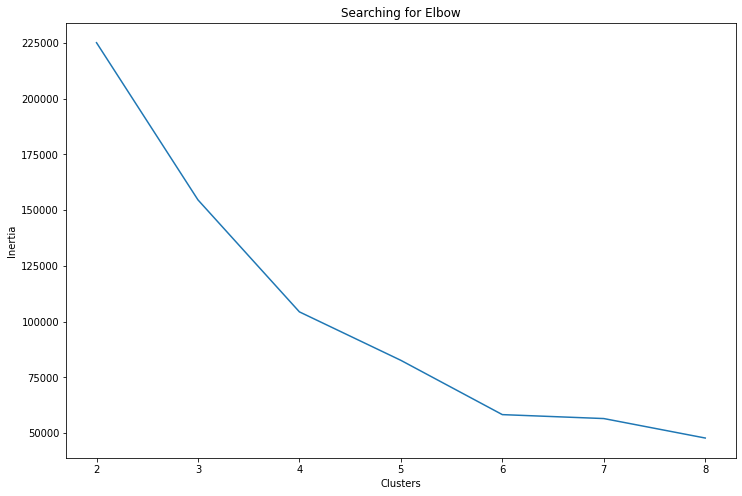

In [190]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

min_clusters = 2
max_clusters = 8

for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=75)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters + 1)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1.  На мою думку 4 кластери є опитмальним для кількості даних які в нас є. Їх більша кількість може створити просто підкластери іншого.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

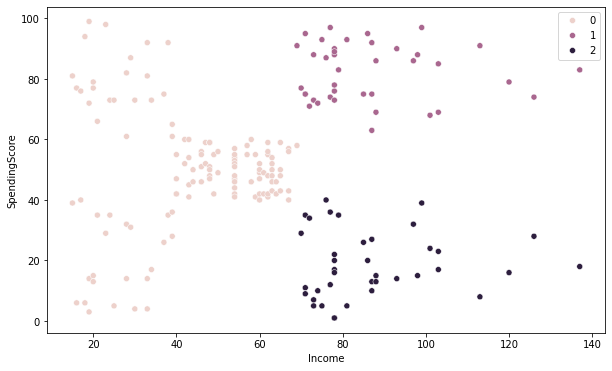

In [191]:
three_clusters = KMeans(n_clusters=3).fit_predict(X)
four_clusters = KMeans(n_clusters=4).fit_predict(X)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='SpendingScore', hue=three_clusters, data=X)
plt.show()

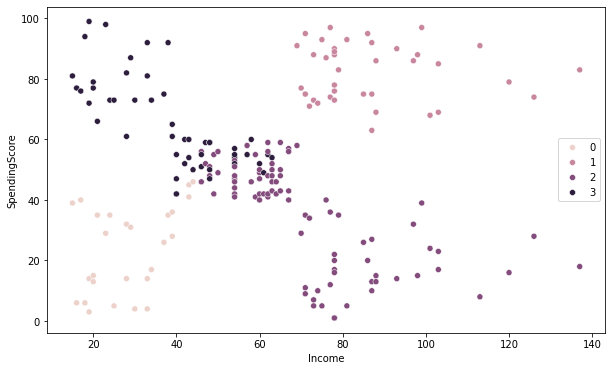

In [192]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='SpendingScore', hue=four_clusters, data=X)
plt.show()

Подивившись на графік, думаю треба спробувати 5 кластерів.

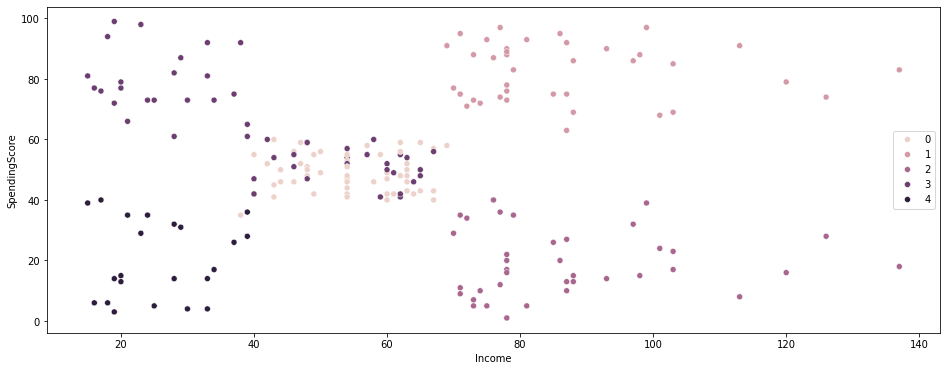

In [193]:
five_clusters = KMeans(n_clusters=5).fit_predict(X)

plt.figure(figsize=(16, 6))
sns.scatterplot(x='Income', y='SpendingScore', hue=five_clusters, data=X)
plt.show()

5 кластерів точно буде краще ніж 4.

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [194]:
fig = px.scatter_3d(data_frame=X, x='Income', y='SpendingScore', z='Age', color=four_clusters)
fig.show()

fig2 = px.scatter_3d(data_frame=X, x='Income', y='SpendingScore', z='Age', color=five_clusters)
fig2.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали. Як я вже сказав раніше, я переконався що 5 кластерів є найоптимальнішим. При чотирьох, як я раніше думав є кращим, дуже розкидані дані в одному з кластерів, що виглядало зразу неправильно.
2. Побудувавши 3д візуалізації ще краще видно наскільки 5 кластерів краще згруповані ніж 4.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


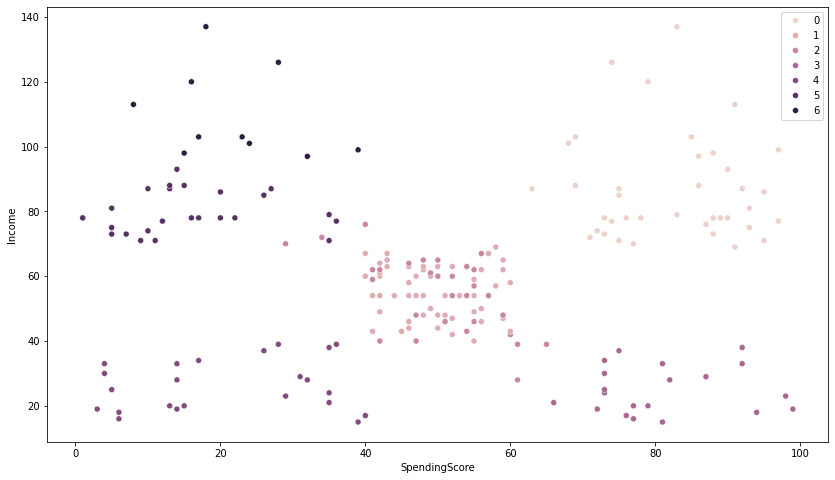

In [195]:
first_clustering = AgglomerativeClustering(n_clusters=7)
second_clustering = AgglomerativeClustering(n_clusters=7, linkage='average')
third_clustering = AgglomerativeClustering(n_clusters=7, linkage='complete')
fourth_clustering = AgglomerativeClustering(n_clusters=7, linkage='single')

cluster1 = first_clustering.fit_predict(X)
cluster2 = second_clustering.fit_predict(X)
cluster3 = third_clustering.fit_predict(X)
cluster4 = fourth_clustering.fit_predict(X)

plt.figure(figsize=(14,8))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=cluster1)
plt.show()

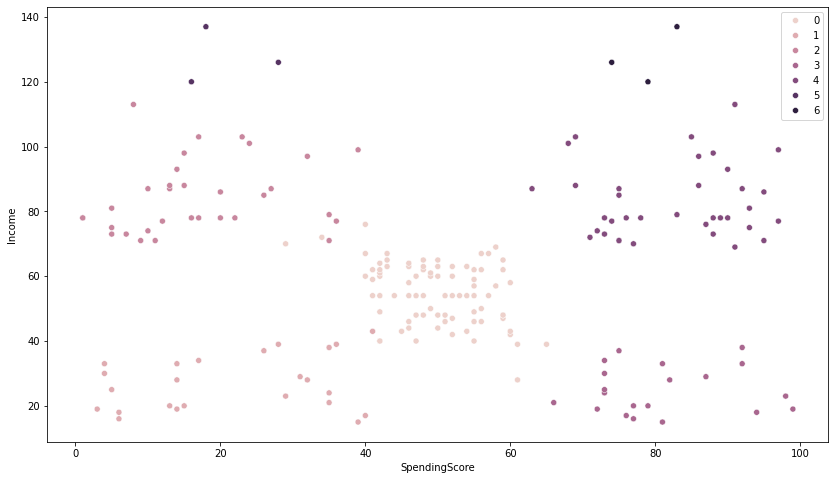

In [196]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=cluster2)
plt.show()

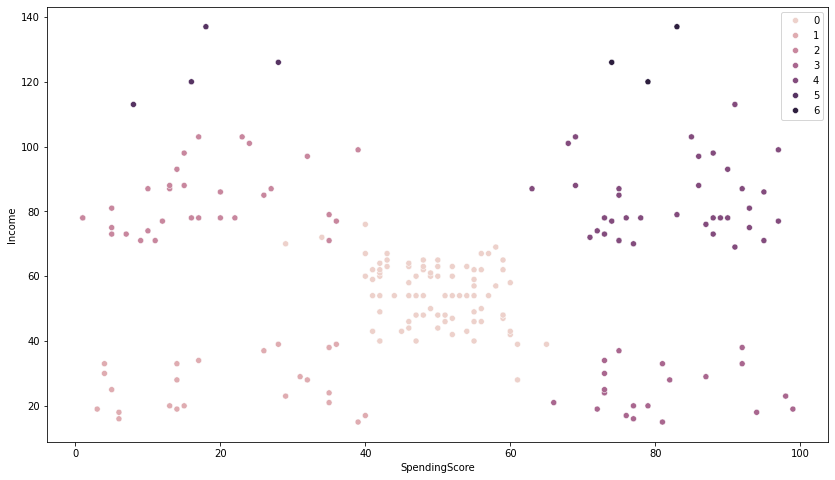

In [197]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=cluster3)
plt.show()

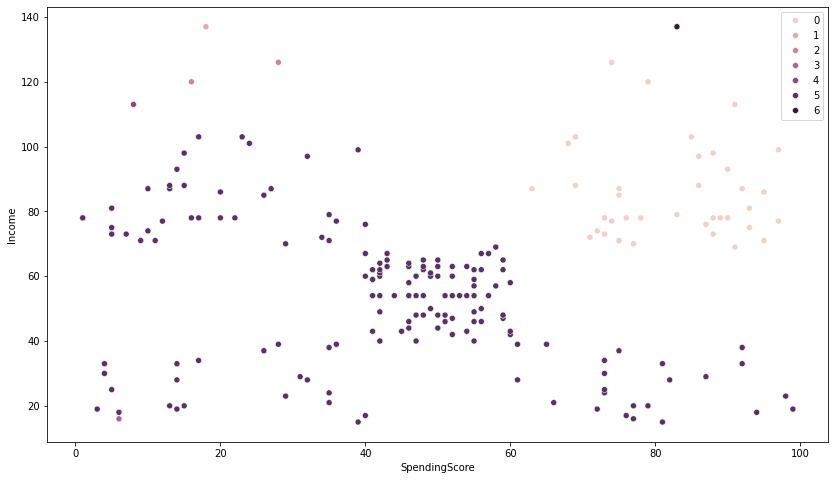

In [198]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=cluster4)
plt.show()

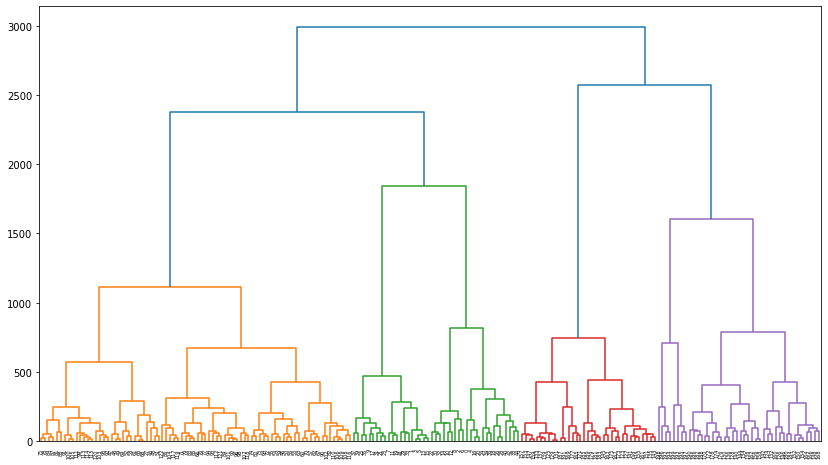

In [199]:
coordinates = X[['Age', 'SpendingScore', 'Income']].values
dist_matrix = distance_matrix(coordinates, coordinates)

hierarchy_ward = hierarchy.linkage(dist_matrix, method='ward')
hierarchy_complete = hierarchy.linkage(dist_matrix, method='complete')
hierarchy_average = hierarchy.linkage(dist_matrix, method='average')
hierarchy_single = hierarchy.linkage(dist_matrix, method='single')

plt.figure(figsize=(14,8))
dend1 = hierarchy.dendrogram(hierarchy_ward, orientation='top')
plt.show()

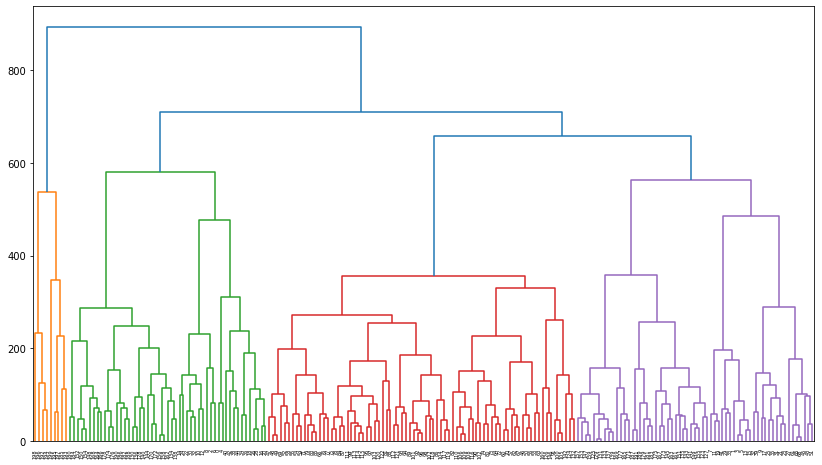

In [200]:
plt.figure(figsize=(14,8))
dend2 = hierarchy.dendrogram(hierarchy_complete, orientation='top')
plt.show()

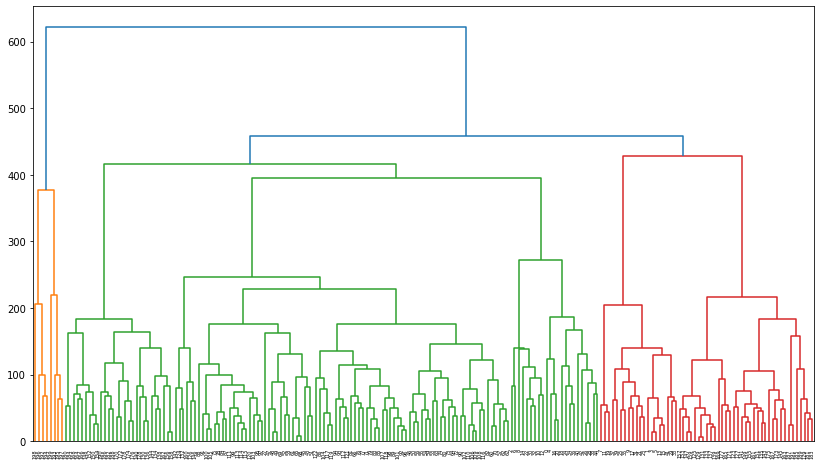

In [201]:
plt.figure(figsize=(14,8))
dend3 = hierarchy.dendrogram(hierarchy_average, orientation='top')
plt.show()

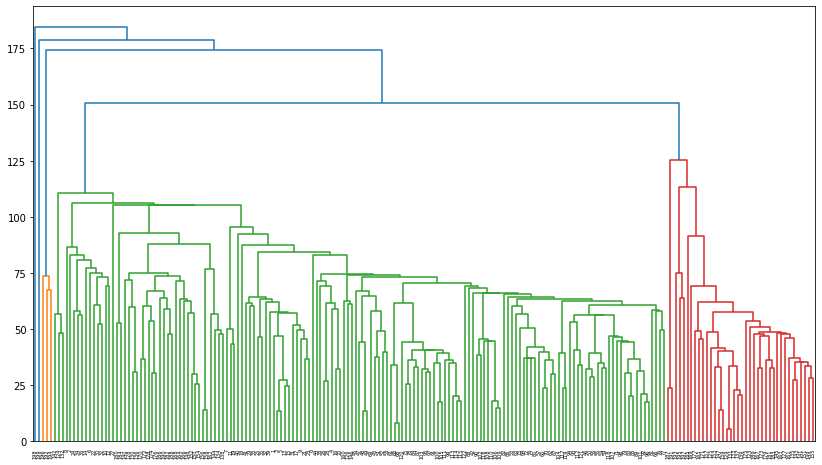

In [202]:
plt.figure(figsize=(14,8))
dend4 = hierarchy.dendrogram(hierarchy_single, orientation='top')
plt.show()

**Висновки з завдання 12 (детальні)**

1. Дендограми відображають звʼязок між значеннями, та в яких вони кластерах. Зовсім інших спосіб відображення даних на відмінну від скатерплоту.
2. Перша та друга дендограма як на мене найкраще відображають кластеризацію, тим часом як наступні дві виглядають не так читабельно.
3. Можу зробити висновок що для деяких типів даних, та кількості кластеризації краще буде підходити один чи інший метод зоображення.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

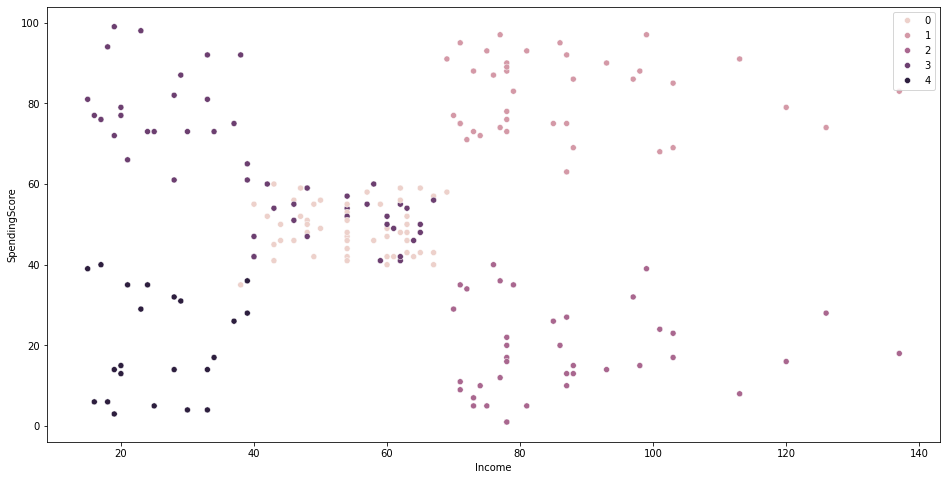

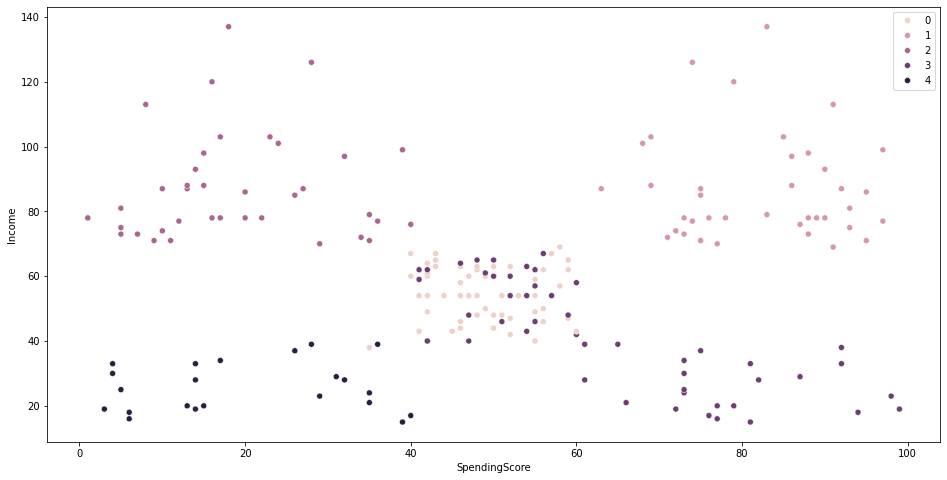

In [206]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Income', y='SpendingScore', hue=five_clusters, data=X)
plt.show()

plt.figure(figsize=(16, 8))
sns.scatterplot(x='SpendingScore', y='Income', data=X, hue=five_clusters)
plt.show()

**Висновки з завдання 13 (детальні)**

1. Я вже заплутався в тих всіх дендограмах.
2. Весь аналіз з оптимальною кількістю кластерів я вже провів вище.
3. З elbow метод мало що зрозуміло, скільки кластерів мати тим більше. Мені особисто навіть на графіку це все легше дається. Як на мене на що elbow метод годиться це тільки мати приблизну кількість кластерів, а тоді вже провіряти конкретно скільки треба, хоча напевно я н